In [ ]:
from platform import python_version
python_version()

In [ ]:
type('AIRLINE') 

In [ ]:
#pip install -r requirement.txt
#pip install mlxtend
#pip install xgboost
#pip install pillow
#pip install fake_useragent
#pip install openpyxl
#pip install geopy
#pip install folium

In [ ]:
import sys
print(sys.executable)

<h1 style="font-family:Calibri;color:black;font-size:197%;text-align:center">The Art and Science of API Design:Crafting Connectivity in & out of Business </h1>

<h1 style="font-family:Calibri;color:black;font-size:117%;text-align:center">Master Data science - a.a. 2022-2023 
Final Project</h1>

<h1 style=";font-family:Calibri;color:violet;font-size:170%;text-align:center;border-radius: px 50px;"> student: Laura Proto </h1>

<h1 style="background-color:#eaeaea;font-family:Calibri;color:#fe0b50;font-size:200%;text-align:center;border-radius: 50px;padding: 10px">Parte pratica: Airlines Data</h1>

In [ ]:
from PIL import Image
from IPython.display import display, HTML

display(HTML("<div style='display:flex; justify-content:center;'><img src='aerei.jpg' style='max-width:70%;'></div>"))

## Il Dataset

Stroke is a serious medical condition that is the second leading cause of death worldwide, according to the World Health Organisation (WHO); it accounts for about 11% of all recorded deaths....


*fonte: https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset


<h1 style="background-color:#eaeaea;font-family:Calibri;color:orange;font-size:250%;text-align:center;border-radius:50px;padding:10px 30px;">Index</h1>

- [Libraries & Utilities](#1)
- [Skyscanner's airlines list](#2)
    - [Take data from site ](#2.1)
    - [Analysis of values](#2.2)
    - [Definition of the Data Transformation Pipeline](#2.3)
- [Airfleets.net](#3)
    - [Outcome](#3.1)
    - [Refinement of the selected model](#3.2)
    - [Learning curves & Validation curves](#3.3)
- [Conclusions](#4)

<a id = '1'></a>
<h1 style="background-color:#eaeaea;font-family:Calibri;color:blue;font-size:250%;text-align:center;border-radius:50px;padding:10px 30px;">Libraries</h1>

In [1]:
import utils_API as ut

import requests
import time
import random
import json
import pandas as pd
import pickle
import re
import folium
import matplotlib.pyplot as plt

from bs4 import BeautifulSoup
from urllib.request import urlopen
from fake_useragent import UserAgent 
from datetime import date
from geopy.geocoders import Nominatim

import warnings
warnings.filterwarnings('ignore')

<a id = '2'></a>
<h1 style="background-color:#eaeaea;font-family:Calibri;color:orange;font-size:250%;text-align:center;border-radius: 50px;padding:10px 30px">Skyscanner.it airlines list</h1>

<a id = '2.1'></a>
<h1 style="font-size: 150%;">Take data from site </h1>

In [ ]:
ua = UserAgent()
ua.random

linee_aeree = []

#adesso ricerchi nei tag che hai memorizzato in soup, tutti quelli di tipo href
for page in range(1,999):
    crescita = 0
    url_al= 'https://www.skyscanner.it/sitemap/voli-tutte-le-compagnie-aeree?page={}'.format(page)
    print(url_al)
    #request scarica l'url e ha delle opzioni per passare ulteriori info, comme lo user agent attraverso gli heders di richiesta pagina
    data = requests.get(url_al,headers = {'User-Agent':'{}'.format(ua.random)})
    #adesso che hai scaricato la pagina, usi bs4 per fare il parse dei tag html
    soup = BeautifulSoup(data.content, 'html.parser')
    for a in soup.find_all('a', href=True):
        #visto che ti ritorna ogni tipo di link, fai un filtro sul loro indirizzo (a.get('href')) per selezionare solo le commpagnie aeree
        if 'linea-aerea' in a.get('href'):
            #print("{}".format(a.text) )
            #print("Found the URL:{}\n{}".format(a.get('href'),a.text) )
            #print("{}".format(a.text) )
            linee_aeree.append(a.text.replace('Voli ',''))
            crescita = 1
    if crescita == 0:
        break

print(len(linee_aeree))

In [ ]:
#create df 
len(linee_aeree)
heading = ['AIRLINE']
df_sky = pd.DataFrame(columns=heading)
for r in linee_aeree:
    if len(r)!=0:
        df_sky.loc[len(df_sky)] = r
df_sky_sorted = df_sky.sort_values(by='AIRLINE')
df_sky_sorted.head()

In [ ]:
#check & count rows
print("Website skyscanner.it:")

df_num_s = len(df_sky)
print(f"- Airlines total: {df_num_s}")      

df_sky_unique = len(df_sky_sorted.drop_duplicates())
print(f"- Unique row: {df_sky_unique}")

sky_nrows_double = len(df_sky_sorted) - len(df_sky_sorted.drop_duplicates())
print(f"- Duplicate rows: {sky_nrows_double}")

#- Airlines total: 1406
#- Unique row: 1387
#- Duplicate rows: 19

In [ ]:
#export to excell
df_sky_no_duplicates = df_sky_sorted.drop_duplicates()
df_sky_no_duplicates.to_excel("df_skyscanners_clean.xlsx", index=False)

<a id = '3'></a>
<h1 style="background-color:#eaeaea;font-family:Calibri;color:green;font-size:250%;text-align:center;border-radius: 50px;padding:10px 30px">Airfleets.net data</h1>

<a id = '2.1'></a>
<h1 style="font-size: 150%;">Take data from site </h1>

In [ ]:
#create random headers
list_headers = [{'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/39.0.2171.95 Safari/537.36'},{"User-Agent": "Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/109.0.0.0 Safari/537.36"},{'User-Agent': 'Mozilla/5.0 (Windows NT 5.1) AppleWebKit/535.1 (KHTML, like Gecko) Chrome/13.0.782.41 Safari/535.1'}]
headers = random.choice(list_headers)
ua = UserAgent()

In [ ]:
#ping site web
ua = UserAgent()

#recall def from utils_API.py
headers = ut.gen_random_headers()
url = 'https://www.airfleets.net/recherche/list-airline-a.htm'
data = requests.get(url, headers=headers)

if data.status_code == 200:
    print(f"Good Job!: {data}")
else:
     print(f"pistù :( {data} \n429 too many request \n403 forbidden")

In [ ]:
#recall def from utils_API.py for dowload data
print(ut.listAlphabet())

In [ ]:
ut.get_num_pages(url) #se stacchi la def in un altro blocco il codice non funziona
alphabet = ut.listAlphabet()
rows = []
row_names = []

In [ ]:
#recall def from utils_API.py for create lowercase alphabet
while(len(alphabet) > 0):
    
    print('https://www.airfleets.net/recherche/list-airline-{}.htm'.format(alphabet[0]))
    num_pagine = ut.get_num_pages('https://www.airfleets.net/recherche/list-airline-{}.htm'.format(alphabet[0]))
    print(num_pagine)
    num_pagine = num_pagine.split('/')[1]
    
    for pagina in range(1,int(num_pagine)+1):
        url =''
        if pagina == 1:
            url = 'https://www.airfleets.net/recherche/list-airline-{}_0.htm'.format(alphabet[0])
        else:
            url = 'https://www.airfleets.net/recherche/list-airline-{}_{}.htm'.format(alphabet[0],(pagina-1)*20)
        data = requests.get( url,headers = {'User-Agent':'{}'.format(ua.random)})
        soup = BeautifulSoup(data.content, 'html.parser')
        print('fetch indirizzo {} {}'.format(url,data))
        
        for table in soup.find_all("table", class_="tablestd"):
            for row in table.find_all("tr", class_="tabcontent"):
                for colonna in row.find_all("td"):
                    row_names.append(colonna.text)
                    #print(row_names)
                #print('fine row')

                rows.append(row_names)
                row_names = []
        #time.sleep(1)
    print('Prepariamo eliminazione lettera {}'.format(alphabet[0]))
    alphabet.pop(0)
                                                                
                                                                                                                  
print("\nAll letters have been taken!")

In [ ]:
len(rows)
#7365 definitivo

In [ ]:
#create pkl file
today = date.today()

tosave = [row]
with open('saved_{}.pkl'.format(today), 'wb') as file:
    # A new file will be created
    pickle.dump(tosave, file)
file = open('saved_2023-09-05.pkl', 'rb')
tosave = pickle.load(file)
file.close()

In [ ]:
#create df airfleets
len(rows)
heading = ['AIRLINE','IMgG','COUNTRY','INFORMATION/N.AIRCRAFT']
df_af = pd.DataFrame(columns=heading)
for r in rows:
    if len(r)!=0:
        r = [el.replace('\n','') for el in  r]
        df_af.loc[len(df_af)] = r

#delete coloumn ImgG
df_af = df_af.drop(columns=['IMgG']) 

#delete empty space before and after string
df_af[['INFORMATION/N.AIRCRAFT', 'COUNTRY', 'AIRLINE']] = df_af[['INFORMATION/N.AIRCRAFT', 'COUNTRY', 'AIRLINE']].applymap(str.strip)

#def to delete the word"aircraft" from row with a number (es: '3 aircraft')
def remove_aircraft(text):
    if re.match(r'\d+\s+aircraft', text):
        return re.sub(r'\s*aircraft', '', text)
    else:
        return text
#appliad def to 'INFORMATION/N.AIRCRAFT' coloumn
df_af['INFORMATION/N.AIRCRAFT'] = df_af['INFORMATION/N.AIRCRAFT'].apply(remove_aircraft)

df_af.head()

In [ ]:
#check & countrows
print("Website airfleets.net:")

df_num = len(df_af)
print(f"- Airlines total: {df_num}")      
 
df_af_unique = len(df_af.drop_duplicates())
print(f"- Unique row: {df_af_unique}")

df_af_nrows_double = len(df_af) - len(df_af.drop_duplicates()) #totali-univoci
print(f"- Duplicates rows: {df_af_nrows_double}")

#- Airlines total: 7553
#- Unique row: 4031
#- Duplicates rows: 3522

In [ ]:
#delete duplicates rows
df_no_duplicates = df_af.drop_duplicates()

In [ ]:
#export to excell clean file
df_no_duplicates.to_excel("df_airfleets_clean.xlsx", index=False)
#df_no_duplicates.to_json("df_airfleets_clean.json", index=False)

df_af_clean = pd.read_excel('df_airfleets_clean.xlsx')
df_af_clean.head(18)

In [ ]:
print('Numero di righe in INFORMATION/N.AIRCRAFT che:')
# - contengono solo un numero senza spazi
count_rows_with_number = df_af_clean['INFORMATION/N.AIRCRAFT'].str.contains(r'^\d+$').sum()
print(f"- Contengono solo il numero di aerei': {count_rows_with_number}")

# - contengono un numero + ' Renamed / Merged to '
count_rows_matching_pattern = df_af_clean['INFORMATION/N.AIRCRAFT'].str.contains(r'^\d+\s+Renamed / Merged to ').sum()
print(f"- Iniziano con un numero + 'Renamed / Merged to': {count_rows_matching_pattern}")

# - contengono la frase 'inactive (with supported aircraft)'
count_inactive_rows = (df_af_clean['INFORMATION/N.AIRCRAFT'] == 'inactive (with supported aircraft)').sum()
print(f"- Contengono 'inactive (with supported aircraft)': {count_inactive_rows}")

# - iniziano con la frase'inactive (with supported aircraft)Renamed / Merged to '
count_rows_start_with_inactive = df_af_clean[df_af_clean['INFORMATION/N.AIRCRAFT'].str.startswith('inactive (with supported aircraft)Renamed / Merged to ')].shape[0]
print(f"- Iniziano con 'inactive (with supported aircraft)Renamed / Merged to ': {count_rows_start_with_inactive}")

df_af_clean.head()

#- Contengono solo il numero di aerei': 1284
#- Iniziano con un numero + 'Renamed / Merged to': 9
#- Contengono 'inactive (with supported aircraft)': 2149
#- Iniziano con 'inactive (with supported aircraft)Renamed / Merged to ': 589

In [ ]:
#per semplificare considero le 9 compagnie aeree i cui aerei 
#sono stati rinominati e assimilati a nuove compagnie aeree come inattive
#sostitusco quindi i valori e rifaccio il conteggio

#trovo le righe che iniziano con 'numero Renamed / Merged to'
mask = df_af_clean['INFORMATION/N.AIRCRAFT'].str.contains(r'^\d+\s+Renamed / Merged to')

#le sostituisco con 'inactive (with supported aircraft)'
df_af_clean.loc[mask, 'INFORMATION/N.AIRCRAFT'] = 'inactive (with supported aircraft)'

print('Numero di righe in INFORMATION/N.AIRCRAFT che:')
# - contengono la frase 'inactive (with supported aircraft)'
count_inactive_rows = (df_af_clean['INFORMATION/N.AIRCRAFT'] == 'inactive (with supported aircraft)').sum()
print(f"- Contengono 'inactive (with supported aircraft)' ORA dovrebbero essere 2158: {count_inactive_rows}")

df_af_clean.head()

In [ ]:
#export to excell clean file
df_af_clean.to_excel("df_airfleets_clean.xlsx", index=False)
df_af_clean.to_json("df_airfleets_clean.json", index=False)

In [ ]:
#------------------------------------------------------------------------------

In [ ]:
#------------------------------------------------------------------------------

In [ ]:
#------------------------------------------------------------------------------

In [ ]:
#--------------------------------------------------------------------------------

In [2]:
df_af_clean = pd.read_excel('df_airfleets_clean.xlsx')
df_af_clean.head()

,AIRLINE,COUNTRY,INFORMATION/N.AIRCRAFT
0,AB Airlines,United Kingdom,inactive (with supported aircraft)
1,Aba Air,Czech Republic,inactive (with supported aircraft)
2,ABC Air Hungary,Hungary,inactive (with supported aircraft)
3,Abelag Airways,Belgium,inactive (with supported aircraft)
4,ABS Jets,Czech Republic,4


In [3]:
num_unique_airlines = df_af_clean['AIRLINE'].nunique()
num_unique_countries = df_af_clean['COUNTRY'].nunique()
print(f"Dataset have {num_unique_airlines} Airlines in {num_unique_countries} countries")
#Dataset have 4031 Airlines in 196 countries

Dataset have 4031 Airlines in 196 countries


In [4]:
#inserendo un paese fornisce l'elenco delle compagnie e dei dati relativi
paese = input("Inserisci il nome di un paese: ").capitalize()  # Trasforma il paese iniziale in maiuscolo

trovato = False  # Flag per verificare se il paese è stato trovato

# Inizializza una lista per memorizzare le compagnie aeree e i dati relativi
compagnie_aeree = []
num = 0

# Ciclo for per cercare il paese
for index, row in df_af_clean.iterrows():
    if row['COUNTRY'].lower() == paese.lower():
        trovato = True
        compagnia_aerea = {
            'AIRLINE': row['AIRLINE'],
            'COUNTRY': row['COUNTRY'],
            'INFORMATION/N.AIRCRAFT': row['INFORMATION/N.AIRCRAFT']
        }
        compagnie_aeree.append(compagnia_aerea)
        num +=1

# Verifica se il paese è stato trovato
if trovato:
    print(f"\nNumero di compagnie aeree trovate: {num}")
    for compagnia in compagnie_aeree:
        print(f"\nNome compagnia aerea: {compagnia['AIRLINE']}")
        print(f"Paese: {compagnia['COUNTRY']}")
        print(f"Numero aerei: {compagnia['INFORMATION/N.AIRCRAFT']}")
        print("-" * 20)
        
else:
    print(f"Nessuna compagnia aerea trovata per il paese {paese}")


Inserisci il nome di un paese: italy

Numero di compagnie aeree trovate: 70

Nome compagnia aerea: Aeroitalia
Paese: Italy
Numero aerei: 9
--------------------

Nome compagnia aerea: Air Bee
Paese: Italy
Numero aerei: inactive (with supported aircraft)
--------------------

Nome compagnia aerea: Air Dolomiti
Paese: Italy
Numero aerei: 19
--------------------

Nome compagnia aerea: Air Europe Italy
Paese: Italy
Numero aerei: inactive (with supported aircraft)
--------------------

Nome compagnia aerea: Air Industria
Paese: Italy
Numero aerei: inactive (with supported aircraft)
--------------------

Nome compagnia aerea: Air Italy
Paese: Italy
Numero aerei: inactive (with supported aircraft)Renamed / Merged to Meridiana
--------------------

Nome compagnia aerea: Air One
Paese: Italy
Numero aerei: inactive (with supported aircraft)Renamed / Merged to Alitalia
--------------------

Nome compagnia aerea: Air One CityLiner
Paese: Italy
Numero aerei: inactive (with supported aircraft)Renamed

In [33]:
#Inserendo un paese fornisce numeri compagnie aeree attive, scomparse, assorbite.
#input paese
paese = input("Inserisci il nome di un paese: ").capitalize()  # Trasforma il paese iniziale in maiuscolo

trovato = False  # Flag per verificare se il paese è stato trovato

active_count = 0
disappeared_count = 0
absorbed_count = 0

#ciclo for per cercare il paese
for index, row in df_af_clean.iterrows():
    if row['COUNTRY'].lower() == paese.lower():  #ignora maiuscole/minuscole
        trovato = True
        information = row['INFORMATION/N.AIRCRAFT']

        if information.isdigit():  #controllo se è un numero (compagnia attiva)
            active_count += 1
        elif information == 'inactive (with supported aircraft)':  #compagnia scomparsa
            disappeared_count += 1
        elif information.startswith('inactive (with supported aircraft)Renamed / Merged to'):  #compagnia assorbita
            absorbed_count += 1

#verifica se il paese è stato trovato
if trovato:
    print(f"Numero di compagnie attive: {active_count}")
    print(f"Numero di compagnie scomparse: {disappeared_count}")
    print(f"Numero di compagnie assorbite: {absorbed_count}")
else:
    print("Paese non trovato. Messaggio di errore.")


Inserisci il nome di un paese: italy
Numero di compagnie attive: 8
Numero di compagnie scomparse: 51
Numero di compagnie assorbite: 11


In [34]:
#created unique country value
country_unique = df_af_clean['COUNTRY'].unique()
#len(country_unique)  #must be 196

In [53]:
#MAPPA 1 - salva mappa in html per API
#creazione di una mappa Folium centrata su una posizione di default
m = folium.Map(location=[0, 0], zoom_start=2)

#creazione di un oggetto geolocalizzatore
geolocator = Nominatim(user_agent="country_locator")

#lista per memorizzare le coordinate geografiche dei paesi
coordinates_list = []

for country in country_unique:
    #ottieni coordinate geografiche del paese
    location = geolocator.geocode(country)

    #aggiunti marker sulla mappa con il nome del paese e memorizza le coordinate
    if location:
        coordinates = [location.latitude, location.longitude]
        coordinates_list.append(coordinates)
        folium.Marker(
            location=coordinates,
            popup=country,
        ).add_to(m)

#salva la mappa in un file HTML
m.save("world_map.html")

In [19]:
df_coor = pd.DataFrame(coordinates_list, columns=["Latitude", "Longitude"])
df_coor.to_excel("coordinates_country.xlsx", index=False)

In [238]:
#MAPPA 2 - Visualizza mappa
#creazione di una mappa Folium centrata su una posizione di default
m = folium.Map(location=[0, 0], zoom_start=2)

#aggiunto marker alla mappa utilizzando i dati da coordinates_list
for coordinates in coordinates_list:
    lat, lon = coordinates
    folium.Marker(
        location=[lat, lon],
        icon=folium.Icon(icon="flag"),  # Puoi personalizzare l'icona se vuoi
    ).add_to(m)

#mostra mappa
m

In [206]:
df_af_clean = pd.read_excel('df_airfleets_clean.xlsx')

active_count = 0
disappeared_count = 0
absorbed_count = 0

grouped = df_af_clean.groupby('COUNTRY')

results = []

for country, group in grouped:
    active_sum = (group['INFORMATION/N.AIRCRAFT'].str.isdigit()).sum()
    disappeared_sum = (group['INFORMATION/N.AIRCRAFT'] == 'inactive (with supported aircraft)').sum()
    absorbed_sum = (group['INFORMATION/N.AIRCRAFT'].str.startswith('inactive (with supported aircraft)Renamed / Merged to')).sum()
    others = disappeared_sum + absorbed_sum 
    tot = others + active_sum
    results.append({'COUNTRY': country,'Tot': tot, 'Airline active': active_sum, 'Airline disappeared': others})

result_df = pd.DataFrame(results)

result_df.head()

,COUNTRY,Tot,Airline active,Airline disappeared
0,Afghanistan,7,2,5
1,Albania,8,2,6
2,Algeria,10,5,5
3,Angola,16,7,9
4,Antigua Barbuda,6,1,5


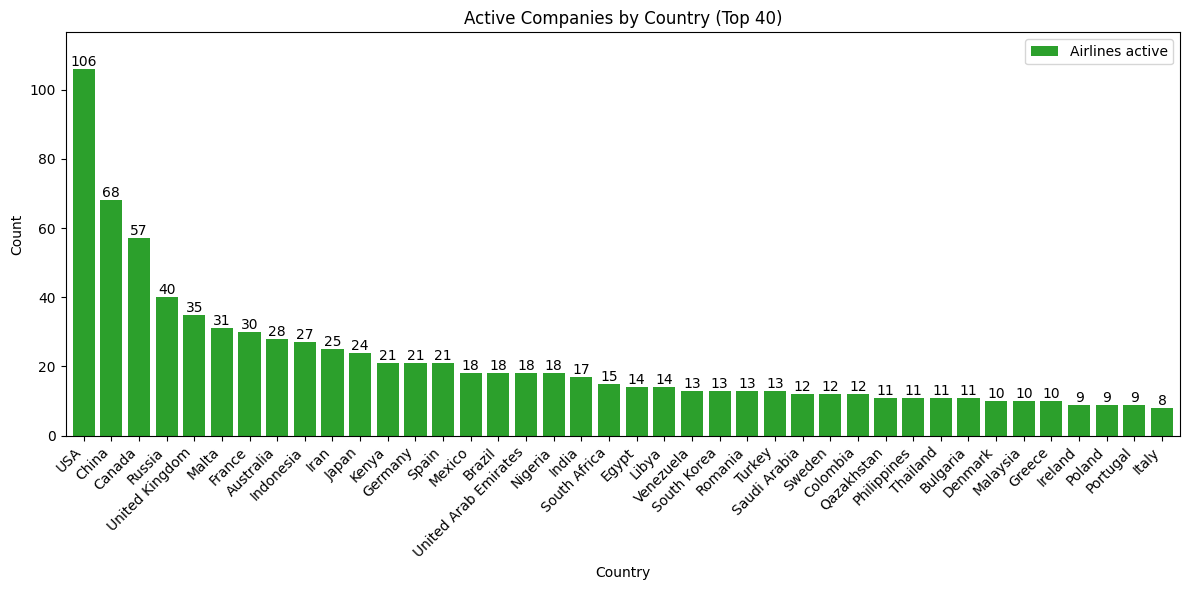

In [250]:
#Chart Active Companies by Country (Top 40)

#df per compagnie attive in ordine decrescente
result_df = result_df.sort_values(by='Airline active', ascending=False)
top_a_df = result_df.head(40)

#take data from df
x = top_a_df['COUNTRY']
y = top_a_df['Airline active']

fig, ax = plt.subplots(figsize=(12, 6))


ax = top_a_df.plot(kind='bar', x='COUNTRY', y=['Airline active'],
                   width=0.8, color=['tab:green'], ax=ax)
#kind = chart tipe
#width = larghezza delle barre 
#ax=ax = specifica l'asse in cui inserire il grafico cioè quello creato in precedenza con "fig, ax = ...""

ax.set_xlabel("Country")
ax.set_ylabel("Count")
ax.set_title("Active Companies by Country (Top 40)")
ax.legend(["Airlines active"], loc="upper right")
ax.set_ylim(0, top_a_df['Airline active'].max() * 1.1)  #limite superiore asse y

#rotazione etichette  paesi
ax.set_xticklabels(x, rotation=45, ha='right')

#dati sopra le barre con rotazione di 45 gradi
for container in ax.containers:
    ax.bar_label(container)

plt.tight_layout()
plt.show()

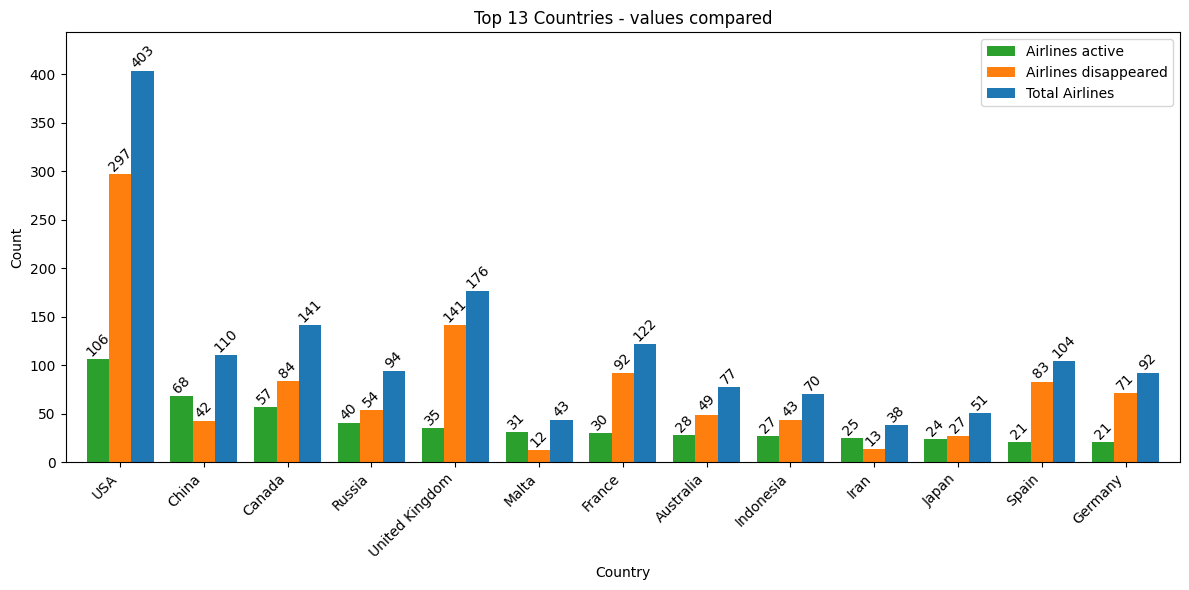

In [237]:
#Chart Top 13 Countries - values compared

#df compagnie attive in ordine decrescente
result_df = result_df.sort_values(by='Airline active', ascending=False)
top_df = result_df.head(13)

#take data from df
x = top_df['COUNTRY']
y1 = top_df['Airline active']
y2 = top_df['Airline disappeared']
y3 = top_df['Tot']

fig, ax = plt.subplots(figsize=(12, 6))

ax = top_df.plot(kind='bar', x='COUNTRY', y=['Airline active', 'Airline disappeared', 'Tot'],
                   width=0.8, color=['tab:green', 'tab:orange', 'tab:blue'], ax=ax)

#kind = chart tipe
#width = larghezza delle barre 
#ax=ax = specifica l'asse in cui inserire il grafico cioè quello creato in precedenza con "fig, ax = ...""

ax.set_xlabel("Country")
ax.set_ylabel("Count")
ax.set_title("Top 13 Countries - values compared")
ax.legend(["Airlines active", "Airlines disappeared", "Total Airlines"], loc="upper right")
ax.set_ylim(0, top_df['Tot'].max() * 1.1)  #limite superiore asse y
ax.set_xticklabels(x, rotation=45, ha='right')

#dati sopra le barre con rotazione di 45 gradi
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', rotation=45)   
    
plt.tight_layout()
plt.show()

### Statistics of categorical data

<font size="4" color=red> Very few patients have had a stroke: the dataset is unbalanced </font>

<a id = '2.3'></a>
<h1 style="font-size: 150%;">Definition of the Data Transformation Pipeline </h1>

In classifier_configs, better results were attempted by trying different algorithms, including XGBClassifier() and SVC(), the results of which were similar and/or worse in terms of performance and timing.

<a id = '3.1'></a>
<h1 style="font-size: 150%;">Outcome</h1>

<font size="4" color=magenta> The best seems to be: </font> <font size="4"><b> LogisticRegression </font>

<a id = '3.2'></a>
<h1 style="font-size: 150%;">Refinement of the selected model</h1>

Previously, we selected one of the best candidate models. Now, we perform the hyperparameter optimization again by fixing the modelling approach and varying the hyperparameters in a range close to that of the selected 

<a id = '3.3'></a>
<h1 style="font-size: 150%;">Learning curves & Validation curves </h1>

The graph shows the learning curve to assess how the performance of the model varies with the size of the training set.

The blue curve shows the accuracy of the model on the training set, while the green curve shows the accuracy on the validation set; the variance of the results is indicated by the coloured areas.

The accuracy of the model decreases rapidly as the size of the training set increases, then increases and finally stabilises. There are no overfitting problems, the accuracy line on the training set is never much higher than that on the validation set, so there is no loss of generality.

As noted earlier, some stroke-related categorical data show who are most at risk. Multiple attempts, with as many algorithms, did not result in exceeding the 30% accuracy value, this does not exclude that additional investigation may lead to the identification of better models.

In [ ]:
#recall def from utils_API.py for create lowercase alphabet
ut.get_num_pages(url) #se stacchi la def in un altro blocco il codice non funziona

alphabet = ut.listAlphabet()
alphabet.pop(0)

rows = []
row_names = []

for index,letter in enumerate(alphabet):
    
    print('https://www.airfleets.net/recherche/list-airline-{}.htm'.format(letter))
    num_pagine = ut.get_num_pages('https://www.airfleets.net/recherche/list-airline-{}.htm'.format(letter))
    print(num_pagine)
    num_pagine = num_pagine.split('/')[1]
    
    for pagina in range(1,int(num_pagine)+1):
        url =''
        if pagina == 1:
            url = 'https://www.airfleets.net/recherche/list-airline-{}_0.htm'.format(letter)
        else:
            url = 'https://www.airfleets.net/recherche/list-airline-{}_{}.htm'.format(letter,(pagina-1)*20)
        data = requests.get( url,headers = {'User-Agent':'{}'.format(ua.random)})
        soup = BeautifulSoup(data.content, 'html.parser')
        print('fetch indirizzo {} {} index:{}'.format(url,data,index))
        
        for table in soup.find_all("table", class_="tablestd"):
            for row in table.find_all("tr", class_="tabcontent"):
                for colonna in row.find_all("td"):
                    row_names.append(colonna.text)
                    #print(row_names)
                #print('fine row')

                rows.append(row_names)
                row_names = []
        time.sleep(1)
    print('prepariamom eliminazione lettera {}'.format(alphabet[0))
    alphabet.pop(0)
                                                                
                                                                
                                                                
print("All letters have been taken!")